In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [7]:
# Import the dataset using Pandas from above mentioned url.
df=pd.read_csv('https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv')

In [8]:
# 2. High Level Data Understanding:
# a. Find no. of rows & columns in the dataset
print('No. of rows :',df.shape[0])
print('No. of column :',df.shape[1])

No. of rows : 57394
No. of column : 49


In [9]:
#  b. Data types of columns.
df.dtypes

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

In [10]:
#  c. Info & describe of data in dataframe.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_million               56401

In [11]:
print(df.describe())

        total_cases      new_cases  new_cases_smoothed  total_deaths  \
count  5.375800e+04   56465.000000        55652.000000  4.436800e+04   
mean   1.677974e+05    1953.576941         1920.431953  6.858639e+03   
std    1.693038e+06   18269.650340        17777.391785  5.578081e+04   
min    1.000000e+00   -8261.000000         -552.000000  1.000000e+00   
25%    1.800000e+02       0.000000            0.857000  1.300000e+01   
50%    2.070000e+03      14.000000           19.429000  8.400000e+01   
75%    2.235675e+04     235.000000          245.286000  7.270000e+02   
max    5.515465e+07  646281.000000       584981.857000  1.328537e+06   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  56465.000000         55652.000000             53471.000000   
mean      47.054317            46.835439              3139.099982   
std      390.853776           378.272794              6183.455260   
min    -1918.000000          -232.143000                 0.001000   
25%   

In [12]:
# Low Level Data Understanding :
#  a. Find count of unique values in location column.
print('unique values in location column :',len(df['location'].unique()))

unique values in location column : 216


In [13]:
#  b. Find which continent has maximum frequency using values counts.
x=df['continent'].value_counts()

In [14]:
#  c. Find maximum & mean value in 'total_cases'.
a=df['total_cases'].describe()

print('Maximum value of total_cases : ',a[7])
print('mean value of total_cases : ',a[1])


Maximum value of total_cases :  55154651.0
mean value of total_cases :  167797.3688753302


In [15]:
#  d. Find 25%,50% & 75% quartile value in 'total_deaths'.
a=df['total_cases'].describe()

print('25% quartile value in total_deaths',a[4])
print('50% quartile value in total_deaths',a[5])
print('75% quartile value in total_deaths',a[6])


25% quartile value in total_deaths 180.0
50% quartile value in total_deaths 2070.0
75% quartile value in total_deaths 22356.75


In [16]:
#  e. Find which continent has maximum 'human_development_index'.
df[df['human_development_index'] == max(df['human_development_index'])][['continent', 'human_development_index']].head(1)

,continent,human_development_index
38632,Europe,0.953


In [17]:
#  f. Find which continent has minimum 'gdp_per_capita'.
df[df['gdp_per_capita'] == min(df['gdp_per_capita'])][['continent', 'gdp_per_capita']].head(1)

,continent,gdp_per_capita
10259,Africa,661.24


#### 4. Filter the dataframe with only this columns
##### ['continent','location','date','total_cases','total_deaths','gdp_per_capita',
 #### ['human_development_index'] and update the data frame.


In [18]:
df=df[['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index']]
df.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498


In [19]:
#  a. Remove all duplicates observations 
df.drop_duplicates(keep = False, inplace = True)

In [20]:
#  b. Find missing values in all columns
df.isnull().sum()

continent                    646
location                       0
date                           0
total_cases                 3636
total_deaths               13026
gdp_per_capita              7027
human_development_index     8147
dtype: int64

In [21]:
# c. Remove all observations where continent column value is missing
df=df.dropna(subset=['continent'])

In [22]:
# d. Fill all missing values with 0
df=df.fillna(0)

In [23]:
# a  a. Convert date column in datetime format using  pandas.to_datetime
df['date'] = pd.to_datetime(df['date'])

In [24]:
#  b. Create new column month after extracting month data from date column
df['Month'] = pd.DatetimeIndex(df['date']).month
df.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,Month
0,Asia,Afghanistan,2019-12-31,0.0,0.0,1803.987,0.498,12
1,Asia,Afghanistan,2020-01-01,0.0,0.0,1803.987,0.498,1
2,Asia,Afghanistan,2020-02-01,0.0,0.0,1803.987,0.498,2
3,Asia,Afghanistan,2020-03-01,0.0,0.0,1803.987,0.498,3
4,Asia,Afghanistan,2020-04-01,0.0,0.0,1803.987,0.498,4


In [25]:
#  a. Find max value in all columns using groupby function on 'continent' column
df.groupby('continent').max()

,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,Month
continent,,,,,,,
Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12
Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12
Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12
North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12
Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12
South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12


In [26]:
#  b. Store the result in a new dataframe named 'df_groupby'.
df_groupby=df.groupby('continent').max()
df_groupby

,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,Month
continent,,,,,,,
Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12
Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12
Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12
North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12
Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12
South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12


In [27]:
df.reset_index()

,index,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,Month
0,0,Asia,Afghanistan,2019-12-31,0.0,0.0,1803.987,0.498,12
1,1,Asia,Afghanistan,2020-01-01,0.0,0.0,1803.987,0.498,1
2,2,Asia,Afghanistan,2020-02-01,0.0,0.0,1803.987,0.498,2
3,3,Asia,Afghanistan,2020-03-01,0.0,0.0,1803.987,0.498,3
4,4,Asia,Afghanistan,2020-04-01,0.0,0.0,1803.987,0.498,4
...,...,...,...,...,...,...,...,...,...
56743,56743,Africa,Zimbabwe,2020-11-13,8696.0,255.0,1899.775,0.535,11
56744,56744,Africa,Zimbabwe,2020-11-14,8765.0,257.0,1899.775,0.535,11
56745,56745,Africa,Zimbabwe,2020-11-15,8786.0,257.0,1899.775,0.535,11
56746,56746,Africa,Zimbabwe,2020-11-16,8786.0,257.0,1899.775,0.535,11


In [28]:
df_groupby['total_deaths_to_total_cases']=df_groupby['total_deaths']/df_groupby['total_cases']

In [29]:
df_groupby.head()

,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,Month,total_deaths_to_total_cases
continent,,,,,,,,
Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12,0.027004
Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12,0.014708
Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12,0.026188
North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12,0.022062
Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12,0.032685


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

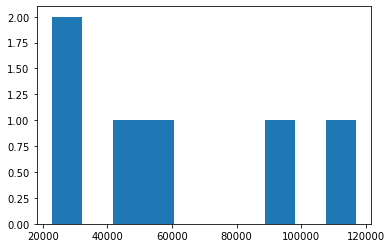

In [31]:
plt.hist(df_groupby['gdp_per_capita'])
plt.show()

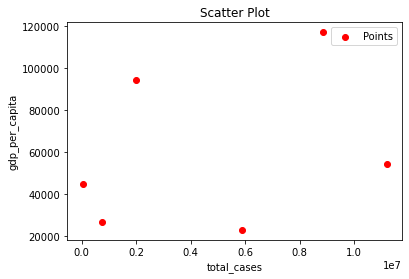

In [32]:
# b. Plot a scatter plot of 'total_cases' & 'gdp_per_capita'
plt.scatter(df_groupby['total_cases'],df_groupby['gdp_per_capita'],label='Points',c='red')
plt.xlabel('total_cases')
plt.ylabel('gdp_per_capita')
plt.title('Scatter Plot')
plt.legend()
plt.show()

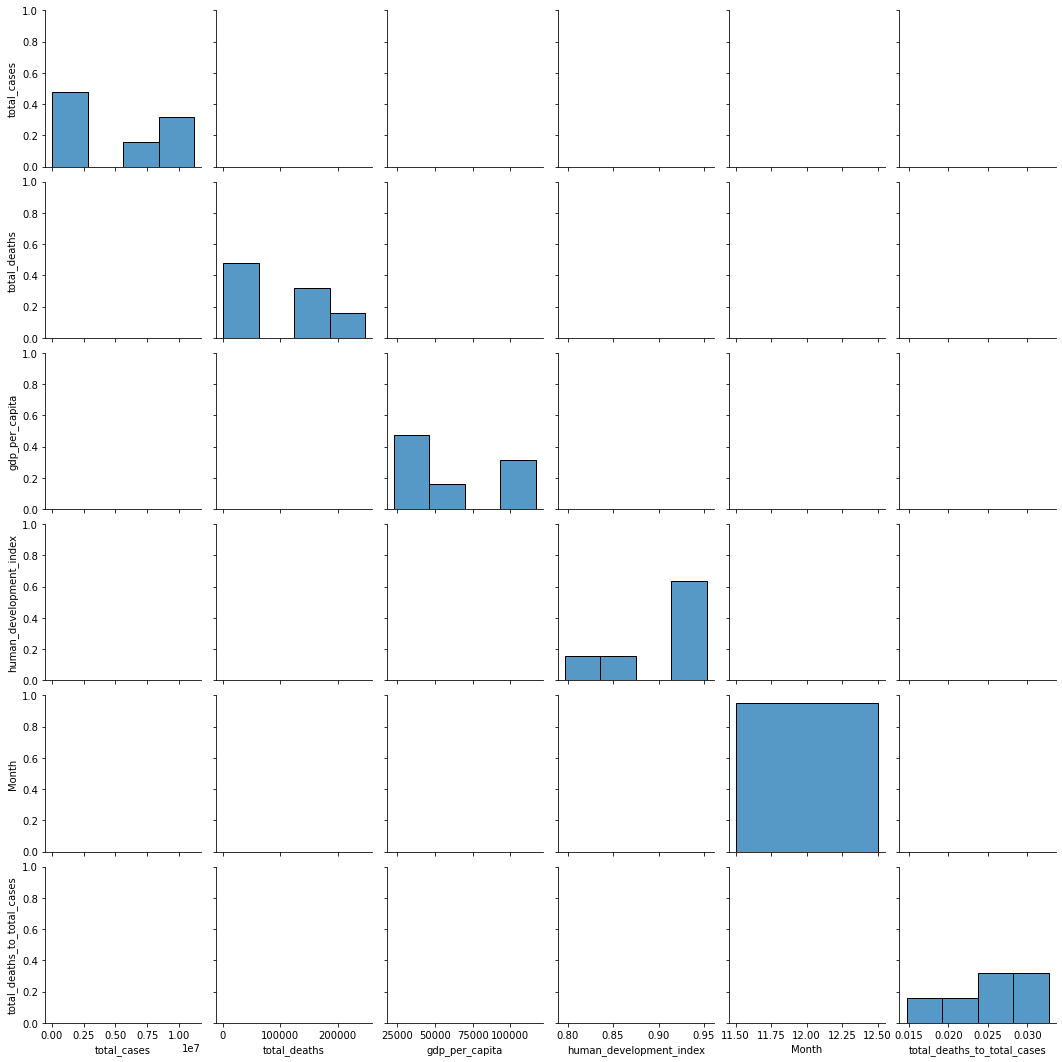

In [33]:
# c. Plot Pairplot on df_groupby dataset.
sns.pairplot(df_groupby, kind='bar')
plt.show()

In [ ]:
#  d. Plot a bar plot of 'continent' column with 'total_cases' .

plt.bar(df['total_cases'],df['continent'],color='black',width=0.4)

plt.xlabel('total_cases')
plt.ylabel('continent')

plt.show()

In [ ]:
# 10.Save the df_groupby dataframe in your local drive using
# pandas.to_csv
#  function .

df.to_csv'(Final project data')